In [3]:
# Load data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
import sklearn
from sklearn.tree import DecisionTreeClassifier


import project_env as pe

%matplotlib inline

# Baseline Models

Model y_10m
  Max precision: 0.767346938776 at recall 0.969072164948
  Threshold of max precision: 0.803278688525
Model y_15m
  Max precision: 0.726577437859 at recall 0.959595959596
  Threshold of max precision: 0.786885245902
Model y_30m
  Max precision: 0.622259696459 at recall 0.953488372093
  Threshold of max precision: 0.737704918033
Model y_45m
  Max precision: 0.551671732523 at recall 0.950261780105
  Threshold of max precision: 0.639344262295
Model y_60m
  Max precision: 0.528301886792 at recall 0.950391644909
  Threshold of max precision: 0.540983606557
Model y_90m
  Max precision: 0.436809815951 at recall 0.951871657754
  Threshold of max precision: 0.327868852459
Model y_120m
  Max precision: 0.421497584541 at recall 0.953551912568
  Threshold of max precision: 0.262295081967


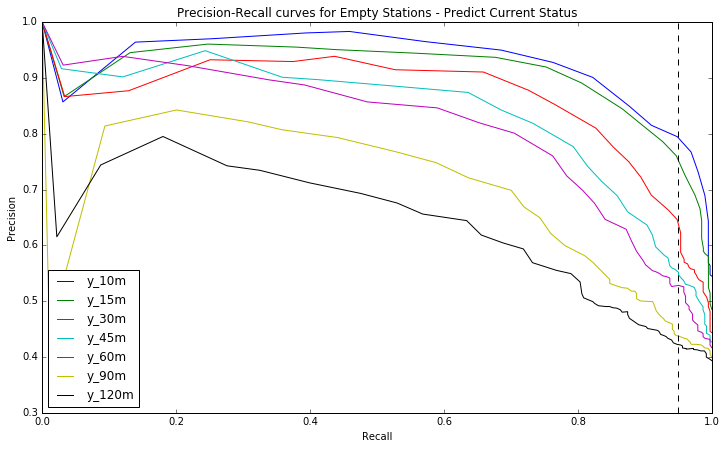

In [7]:
from sklearn.metrics import precision_recall_curve

def pr_curve(actual, predictions, label):
    curve = precision_recall_curve(actual, predictions)
    precision, recall, thresholds = curve
    mp, mr, mt = pe.max_precision_for_recall(curve)
    print('Model', label)
    print('  Max precision:', mp, 'at recall', mr)
    print('  Threshold of max precision:', mt)
    plt.plot(recall, precision, label=label)
   

plt.figure(figsize=(12, 7))
for x in ['y_10m','y_15m','y_30m','y_45m','y_60m','y_90m','y_120m']:
    data_baseline = pe.load_split_bucket(519, target=x, log=False)
    data_baseline = pe.binarize(data_baseline, -1) 
    pr_curve(data_baseline['dev'][1],data_baseline['dev'][0]['num_docks_available_scaled'], x)
    
#plt.xlim([0.9, 1.0])
#plt.ylim([0.4, 0.7])
plt.axvline(x=0.95, color='k', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower left")
plt.title('Precision-Recall curves for Empty Stations - Predict Current Status')
plt.show()

Model y_10m
  Max precision: 0.6 at recall 0.957446808511
  Threshold of max precision: 0.786885245902
Model y_15m
  Max precision: 0.441176470588 at recall 0.957446808511
  Threshold of max precision: 0.688524590164
Model y_30m
  Max precision: 0.323741007194 at recall 0.957446808511
  Threshold of max precision: 0.622950819672
Model y_45m
  Max precision: 0.340740740741 at recall 0.958333333333
  Threshold of max precision: 0.639344262295
Model y_60m
  Max precision: 0.301282051282 at recall 0.979166666667
  Threshold of max precision: 0.590163934426
Model y_90m
  Max precision: 0.159420289855 at recall 0.977777777778
  Threshold of max precision: 0.426229508197
Model y_120m
  Max precision: 0.129230769231 at recall 0.976744186047
  Threshold of max precision: 0.327868852459


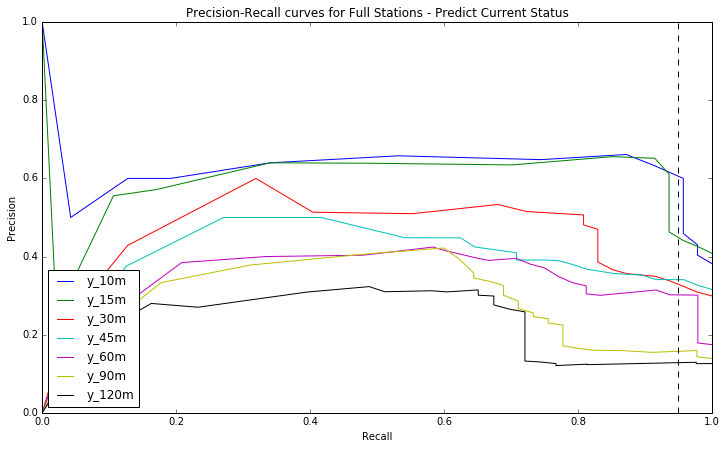

In [10]:
plt.figure(figsize=(12, 7))

for x in ['y_10m','y_15m','y_30m','y_45m','y_60m','y_90m','y_120m']:
    data_baseline = pe.load_split_bucket(519, target=x, log=False)
    data_baseline2 = pe.binarize(data_baseline, 1) 
    pr_curve(data_baseline2['dev'][1],data_baseline2['dev'][0]['num_bikes_available_scaled'], x)
    

#plt.xlim([0.9, 1.0])
#plt.ylim([0.4, 0.7])
plt.axvline(x=0.95, color='k', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower left")
plt.title('Precision-Recall curves for Full Stations - Predict Current Status')
plt.show()